## OASIS INFOBYTE
## TASK 3: CAR PRICE PREDICTION USING MACHINE LEARNING
## NAME: RUCHITA KAMBLE

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\Lenovo\Desktop\Oasis Projects\train.csv')

In [3]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [4]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [5]:
df.dtypes

ID                    int64
Price                 int64
Levy                 object
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage              object
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df['Levy'] = pd.to_numeric(df['Levy'], errors='coerce')
df['Engine volume'] = pd.to_numeric(df['Engine volume'], errors='coerce')
df['Mileage'] = df['Mileage'].astype(str)
df['Mileage'] = df['Mileage'].str.replace('km', '').str.strip()
df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')
df['Airbags'] = pd.to_numeric(df['Airbags'], errors='coerce')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9684\856836700.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

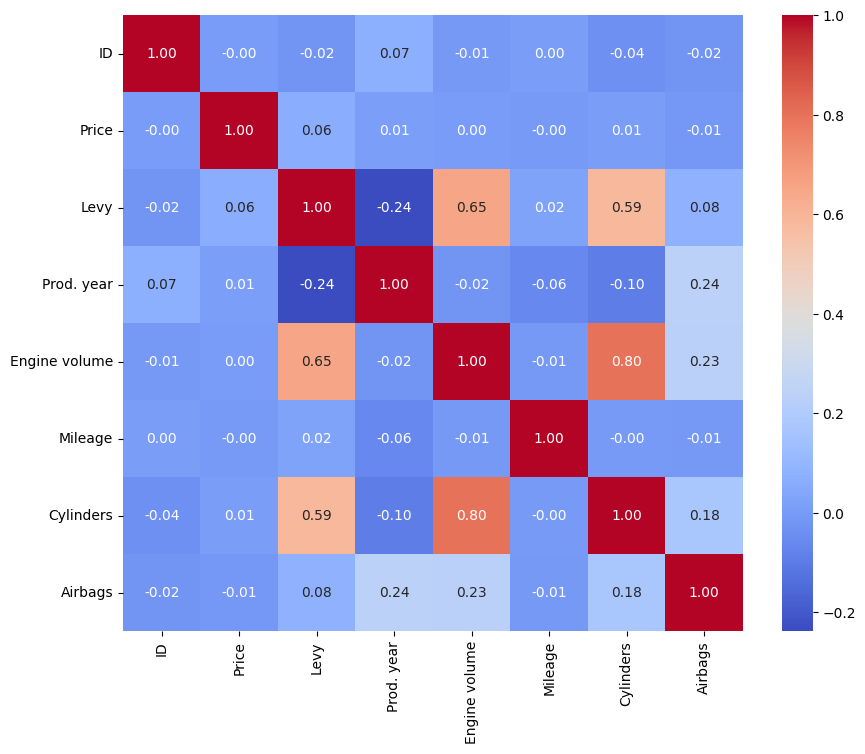

In [8]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', ax=ax)

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [10]:
df['Levy'] = pd.to_numeric(df['Levy'], errors='coerce')
df['Engine volume'] = pd.to_numeric(df['Engine volume'], errors='coerce')
df['Mileage'] = df['Mileage'].astype(str).str.replace('km', '').str.strip()
df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')
df['Airbags'] = pd.to_numeric(df['Airbags'], errors='coerce')

In [11]:
# Drop rows with missing values
df.dropna(inplace=True)

# Define the selected features and target variable
selected_features = ['Engine volume', 'Cylinders', 'Levy']
X = df[selected_features]
Y = df['Price']

In [12]:
# Create the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X, Y)

# Perform predictions on the training data
y_pred = model.predict(X)

# Calculate mean squared error on the training data
mse = mean_squared_error(Y, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 347653549.3174444


In [13]:
# Load the new dataset for predictions
new_data = pd.read_csv('./test.csv')

# Data preprocessing for the new dataset
new_data['Levy'] = pd.to_numeric(new_data['Levy'], errors='coerce')
new_data['Engine volume'] = pd.to_numeric(new_data['Engine volume'], errors='coerce')
new_data['Mileage'] = new_data['Mileage'].astype(str).str.replace('km', '').str.strip()
new_data['Mileage'] = pd.to_numeric(new_data['Mileage'], errors='coerce')
new_data['Airbags'] = pd.to_numeric(new_data['Airbags'], errors='coerce')

In [14]:
# Handle missing values in the new dataset
new_data['Engine volume'].fillna(X['Engine volume'].mean(), inplace=True)
new_data['Cylinders'].fillna(X['Cylinders'].mean(), inplace=True)
new_data['Levy'].fillna(X['Levy'].mode()[0], inplace=True)

# Make predictions on the new dataset
new_predictions = model.predict(new_data[selected_features])

In [15]:
# Add Manufacturer, Model, and Predicted Price columns to the new dataset
new_data['Predicted Price'] = new_predictions

# Select only the Manufacturer, Model, and Predicted Price columns
new_data_predictions = new_data[['Manufacturer', 'Model', 'Predicted Price']]

# Display the first 50 entries from the predicted car prices
print('Predicted Car Prices for New Dataset (First 50 entries):')
print(new_data_predictions.head(50))

Predicted Car Prices for New Dataset (First 50 entries):
     Manufacturer             Model  Predicted Price
0      VOLKSWAGEN              Golf     17252.384705
1         HYUNDAI            Sonata     17341.047375
2          NISSAN             Tiida     16093.716585
3           VOLVO              XC90     14750.781627
4            OPEL             Astra     16232.308895
5             BMW               320     16757.803695
6           LEXUS            GX 460     14801.608197
7   MERCEDES-BENZ             E 350     15939.832042
8         HYUNDAI            Sonata     17281.259146
9          DAEWOO           Lacetti     16038.463981
10         TOYOTA             Camry     16867.301291
11        HYUNDAI            Sonata     15970.526102
12         TOYOTA             Prius     16038.463981
13        HYUNDAI     Sonata hybrid     17479.639685
14        HYUNDAI            Sonata     16786.678135
15          LEXUS           CT 200h     15802.949215
16  MERCEDES-BENZ             E 240     12